# NYC Taxi Trip EDA Project
This notebook contains the exploratory data analysis (EDA) for the 2017 NYC Yellow Taxi Trip dataset. The goal is to uncover insights and trends in taxi ridership patterns.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Display settings
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set(style='whitegrid')

In [3]:
# Load the dataset
df = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

# Initial exploration
print("Shape of dataset:", df.shape)
print("\nColumn types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
df.head()

Shape of dataset: (22699, 18)

Column types:
 Unnamed: 0                 int64
VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

Missing values:
 Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extr

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.00,0.00,0.50,2.76,0.00,0.30,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.00,0.00,0.50,4.00,0.00,0.30,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.50,0.00,0.50,1.45,0.00,0.30,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.50,0.00,0.50,6.39,0.00,0.30,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.50,0.50,0.50,0.00,0.00,0.30,17.80


In [4]:
# Convert datetime columns
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Create new features
df['trip_duration_minutes'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

In [5]:
# Remove negative/zero or outlier trip durations and distances
df = df[(df['trip_duration_minutes'] > 1) & (df['trip_duration_minutes'] < 180)]
df = df[(df['trip_distance'] > 0) & (df['trip_distance'] < 100)]

In [6]:
# Summary statistics
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
         Unnamed: 0  VendorID           tpep_pickup_datetime  \
count     22415.00  22415.00                          22415   
mean   56742259.19      1.56  2017-06-29 07:38:57.826946304   
min       12127.00      1.00            2017-01-01 00:08:25   
25%    28532137.50      1.00     2017-03-30 04:22:07.500000   
50%    56734540.00      2.00            2017-06-23 13:17:38   
75%    85332690.00      2.00     2017-10-02 09:19:18.500000   
max   113486300.00      2.00            2017-12-31 23:45:30   
std    32729652.29      0.50                            NaN   

               tpep_dropoff_datetime  passenger_count  trip_distance  \
count                          22415         22415.00       22415.00   
mean   2017-06-29 07:53:25.960963584             1.64           2.94   
min              2017-01-01 00:17:20             0.00           0.01   
25%              2017-03-30 04:32:40             1.00           1.00   
50%              2017-06-23 13:28:18             1

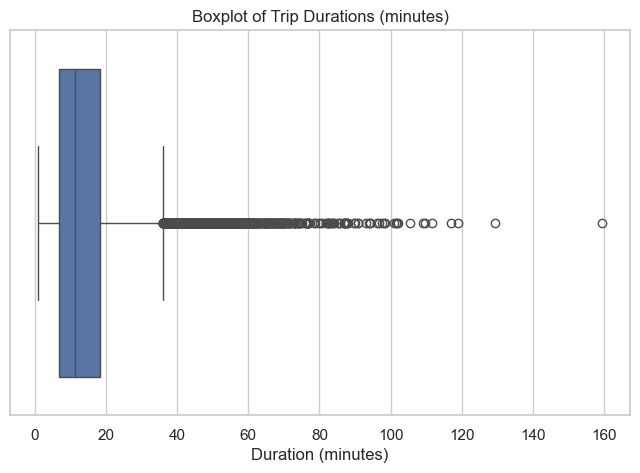

In [7]:
# Boxplot: Trip Duration
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['trip_duration_minutes'])
plt.title("Boxplot of Trip Durations (minutes)")
plt.xlabel("Duration (minutes)")
plt.show()

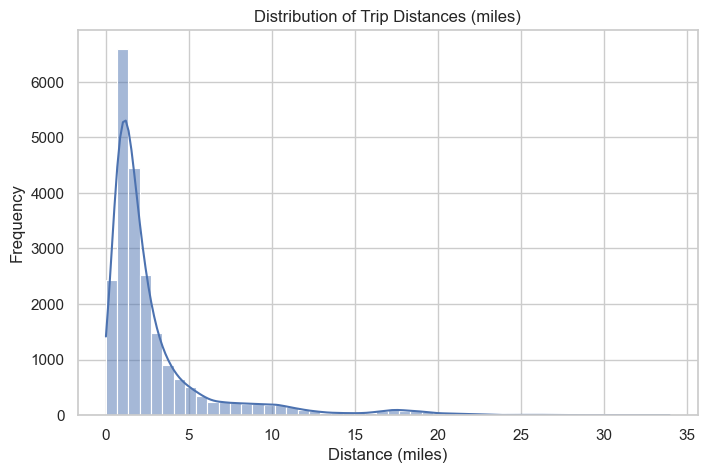

In [8]:
# Histogram: Trip Distance
plt.figure(figsize=(8, 5))
sns.histplot(df['trip_distance'], bins=50, kde=True)
plt.title("Distribution of Trip Distances (miles)")
plt.xlabel("Distance (miles)")
plt.ylabel("Frequency")
plt.show()

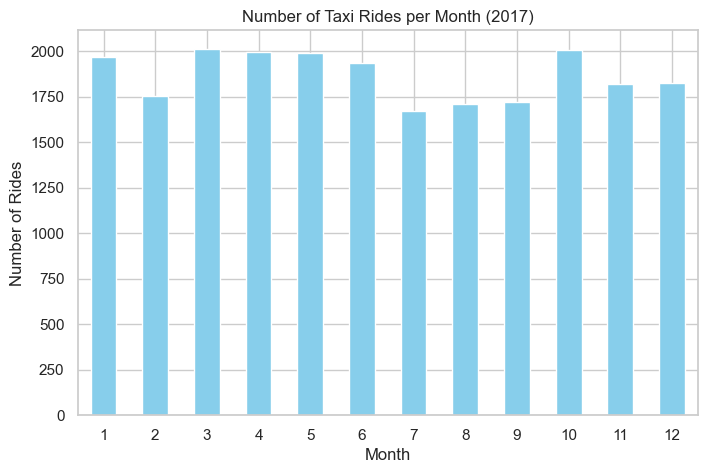

In [9]:
# Time Series: Rides per Month
rides_per_month = df['pickup_month'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
rides_per_month.plot(kind='bar', color='skyblue')
plt.title("Number of Taxi Rides per Month (2017)")
plt.xlabel("Month")
plt.ylabel("Number of Rides")
plt.xticks(rotation=0)
plt.show()

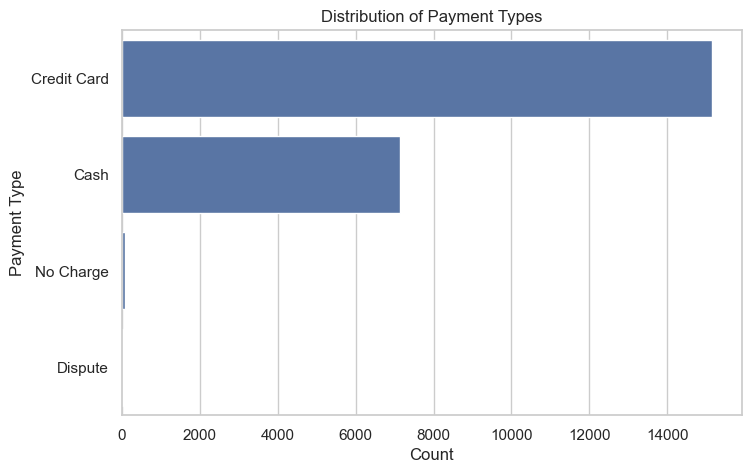

In [10]:
# Barplot: Payment Type
payment_labels = {
    1: 'Credit Card', 2: 'Cash', 3: 'No Charge', 4: 'Dispute', 5: 'Unknown', 6: 'Voided'
}
df['payment_type'] = df['payment_type'].map(payment_labels)
plt.figure(figsize=(8, 5))
sns.countplot(y='payment_type', data=df, order=df['payment_type'].value_counts().index)
plt.title("Distribution of Payment Types")
plt.xlabel("Count")
plt.ylabel("Payment Type")
plt.show()

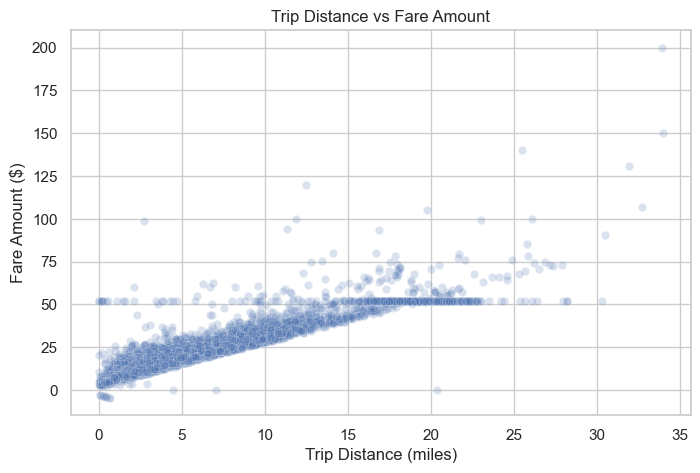

In [11]:
# Scatterplot: Trip Distance vs Fare
plt.figure(figsize=(8, 5))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df, alpha=0.2)
plt.title("Trip Distance vs Fare Amount")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.show()